In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
dc_taxi = pd.read_csv('Taxicab_Trips_Sampling_in_July_2017.csv')

In [3]:
dc_taxi.head()

,OBJECTID_1,OBJECTID,TRIPTYPE,PROVIDER,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,...,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,PICKUP_BLOCKNAME,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCKNAME,AIRPORT,PICKUPDATETIME_TR,DROPOFFDATETIME_TR
0,1001,27214366,PSP,"Transco, Inc.",3.52,0.00,0.25,21.75,0.0,25.52,...,1.0,38.896656,-76.947648,4000 - 4121 BLOCK OF MINNESOTA AVENUE NE,38.896656,-76.947648,4000 - 4121 BLOCK OF MINNESOTA AVENUE NE,N,2017-07-28T18:00:00.000Z,2017-07-28T18:00:00.000Z
1,1002,27214367,PSP,"Transco, Inc.",5.14,0.00,0.25,0.00,0.0,5.39,...,4.0,38.899976,-76.982460,1500 - 1599 BLOCK OF BENNING ROAD NE,38.900202,-76.994359,800 - 899 BLOCK OF H STREET NE,N,2017-07-28T18:00:00.000Z,2017-07-28T18:00:00.000Z
2,1003,27214368,PSP,"Transco, Inc.",14.32,4.67,0.25,1.00,0.0,20.24,...,23.0,38.886039,-77.018731,400 - 599 BLOCK OF C STREET SW,38.911497,-77.038485,1600 - 1618 BLOCK OF 17TH STREET NW,N,2017-07-28T19:00:00.000Z,2017-07-28T19:00:00.000Z
3,1004,27214369,PSP,"Transco, Inc.",4.33,1.12,0.25,1.00,0.0,6.70,...,2.0,38.905654,-77.042568,1800 - 1899 BLOCK OF M STREET NW,38.901930,-77.043459,900 - 999 BLOCK OF 19TH STREET NW,N,2017-07-28T19:00:00.000Z,2017-07-28T19:00:00.000Z
4,1005,27214370,PSP,"Transco, Inc.",11.89,0.00,0.25,1.00,0.0,13.14,...,18.0,38.890500,-77.025048,700 - 1199 BLOCK OF MADISON DRIVE NW,38.916384,-77.046519,1900 - 1999 BLOCK OF CONNECTICUT AVENUE NW,N,2017-07-29T14:00:00.000Z,2017-07-29T15:00:00.000Z


In [4]:
dc_taxi.shape

(228611, 29)

In [5]:
dc_taxi.dtypes

OBJECTID_1                   int64
OBJECTID                     int64
TRIPTYPE                    object
PROVIDER                    object
METERFARE                  float64
TIP                        float64
SURCHARGE                  float64
EXTRAS                     float64
TOLLS                      float64
TOTALAMOUNT                float64
PAYMENTTYPE                 object
PAYMENTCARDPROVIDER         object
PICKUPCITY                  object
PICKUPSTATE                 object
PICKUPZIP                   object
DROPOFFCITY                 object
DROPOFFSTATE                object
DROPOFFZIP                  object
TRIPMILEAGE                float64
TRIPTIME                   float64
PICKUP_BLOCK_LATITUDE      float64
PICKUP_BLOCK_LONGITUDE     float64
PICKUP_BLOCKNAME            object
DROPOFF_BLOCK_LATITUDE     float64
DROPOFF_BLOCK_LONGITUDE    float64
DROPOFF_BLOCKNAME           object
AIRPORT                     object
PICKUPDATETIME_TR           object
DROPOFFDATETIME_TR  

In [6]:
dc_taxi.describe()

,OBJECTID_1,OBJECTID,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,TRIPMILEAGE,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE
count,228611.000000,2.286110e+05,228611.000000,227266.000000,227266.000000,227266.000000,227266.000000,228611.000000,227053.000000,2.142480e+05,196581.000000,196581.000000,180638.000000,180638.000000
mean,114306.000000,2.947953e+07,12.428953,1.250630,0.249517,0.606794,0.001193,14.536324,4.470613,8.315156e+02,38.902876,-77.029668,38.904968,-77.029751
std,65994.455532,1.326066e+06,9.921780,5.336271,0.082423,1.014569,0.124076,11.932572,95.165003,1.430010e+05,0.014940,0.018711,0.016867,0.021313
min,1.000000,2.719664e+07,-82.750000,-3.000000,-37.810000,-3.750000,-1.500000,-83.000000,-32.100000,0.000000e+00,38.814661,-77.112057,38.812061,-77.113633
25%,57153.500000,2.831322e+07,7.300000,0.000000,0.250000,0.000000,0.000000,8.820000,1.000000,7.000000e+00,38.895463,-77.041686,38.896039,-77.042574
50%,114306.000000,2.949036e+07,10.000000,0.000000,0.250000,0.000000,0.000000,11.820000,1.900000,1.100000e+01,38.900339,-77.031140,38.901935,-77.030801
75%,171458.500000,3.064171e+07,14.590000,2.000000,0.250000,1.000000,0.000000,17.030000,3.310000,1.700000e+01,38.906836,-77.018731,38.910634,-77.017554
max,228611.000000,3.174758e+07,788.100000,2322.000000,8.720000,65.000000,39.010000,2333.600000,5723.260000,2.502095e+07,38.991763,-76.911744,38.991518,-76.910927


In [7]:
dc_taxi.isna().sum()

OBJECTID_1                     0
OBJECTID                       0
TRIPTYPE                       0
PROVIDER                       0
METERFARE                      0
TIP                         1345
SURCHARGE                   1345
EXTRAS                      1345
TOLLS                       1345
TOTALAMOUNT                    0
PAYMENTTYPE                    0
PAYMENTCARDPROVIDER            0
PICKUPCITY                 59176
PICKUPSTATE                53343
PICKUPZIP                  46379
DROPOFFCITY                70215
DROPOFFSTATE               54288
DROPOFFZIP                 46609
TRIPMILEAGE                 1558
TRIPTIME                   14363
PICKUP_BLOCK_LATITUDE      32030
PICKUP_BLOCK_LONGITUDE     32030
PICKUP_BLOCKNAME           32030
DROPOFF_BLOCK_LATITUDE     47973
DROPOFF_BLOCK_LONGITUDE    47973
DROPOFF_BLOCKNAME          47973
AIRPORT                        0
PICKUPDATETIME_TR              0
DROPOFFDATETIME_TR             0
dtype: int64

In [8]:
dc_taxi = dc_taxi.loc[dc_taxi.TOTALAMOUNT>0]
dc_taxi = dc_taxi.loc[dc_taxi.TOTALAMOUNT<1000]
dc_taxi = dc_taxi.loc[dc_taxi.METERFARE>0]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPMILEAGE>0]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPMILEAGE<200]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPTIME>0]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPTIME<120]
dc_taxi.AIRPORT = dc_taxi.AIRPORT == "Y"
dc_taxi["pickup_quadrant"] = dc_taxi.PICKUP_BLOCKNAME.str.extract(r"\s([NS][EW])\b")
dc_taxi["dropoff_quadrant"] = dc_taxi.DROPOFF_BLOCKNAME.str.extract(r"\s([NS][EW])\b")
dc_taxi["tipping"] = (dc_taxi.TIP>0) * 1 

dc_taxi['pickup_datetime'] = pd.to_datetime(dc_taxi.PICKUPDATETIME_TR)
dc_taxi['dropoff_datetime'] = pd.to_datetime(dc_taxi.DROPOFFDATETIME_TR)
dc_taxi['pickup_date'] = dc_taxi.pickup_datetime.dt.date
dc_taxi['pickup_hour'] = dc_taxi.pickup_datetime.dt.hour
dc_taxi['dropoff_date'] = dc_taxi.dropoff_datetime.dt.date
dc_taxi['dropoff_hour'] = dc_taxi.dropoff_datetime.dt.hour

dc_taxi = dc_taxi.drop(["OBJECTID_1", "OBJECTID"], axis=1)

In [9]:
dc_taxi.loc[dc_taxi.DROPOFFSTATE=="Virgin Islands", "DROPOFFSTATE"] = "Virginia"
dc_taxi.loc[dc_taxi.PICKUPSTATE=="Virgin Islands", "PICKUPSTATE"] = "Virginia"
dc_taxi.loc[dc_taxi.DROPOFFSTATE=="Washington", "DROPOFFSTATE"] = "District of Columbia"
dc_taxi.loc[dc_taxi.PICKUPSTATE=="Washington", "PICKUPSTATE"] = "District of Columbia"
dc_taxi.loc[dc_taxi.PAYMENTCARDPROVIDER=="Unknown = 0", "PAYMENTCARDPROVIDER"] = np.nan

In [10]:
dc_taxi.head()

,TRIPTYPE,PROVIDER,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,PAYMENTTYPE,PAYMENTCARDPROVIDER,...,DROPOFFDATETIME_TR,pickup_quadrant,dropoff_quadrant,tipping,pickup_datetime,dropoff_datetime,pickup_date,pickup_hour,dropoff_date,dropoff_hour
0,PSP,"Transco, Inc.",3.52,0.00,0.25,21.75,0.0,25.52,CreditCard,VisaCredit,...,2017-07-28T18:00:00.000Z,NE,NE,0,2017-07-28 18:00:00+00:00,2017-07-28 18:00:00+00:00,2017-07-28,18,2017-07-28,18
1,PSP,"Transco, Inc.",5.14,0.00,0.25,0.00,0.0,5.39,Cash,Cash,...,2017-07-28T18:00:00.000Z,NE,NE,0,2017-07-28 18:00:00+00:00,2017-07-28 18:00:00+00:00,2017-07-28,18,2017-07-28,18
2,PSP,"Transco, Inc.",14.32,4.67,0.25,1.00,0.0,20.24,CreditCard,MasterCardCredit,...,2017-07-28T19:00:00.000Z,SW,NW,1,2017-07-28 19:00:00+00:00,2017-07-28 19:00:00+00:00,2017-07-28,19,2017-07-28,19
3,PSP,"Transco, Inc.",4.33,1.12,0.25,1.00,0.0,6.70,CreditCard,MasterCardCredit,...,2017-07-28T19:00:00.000Z,NW,NW,1,2017-07-28 19:00:00+00:00,2017-07-28 19:00:00+00:00,2017-07-28,19,2017-07-28,19
4,PSP,"Transco, Inc.",11.89,0.00,0.25,1.00,0.0,13.14,Cash,Cash,...,2017-07-29T15:00:00.000Z,NW,NW,0,2017-07-29 14:00:00+00:00,2017-07-29 15:00:00+00:00,2017-07-29,14,2017-07-29,15


In [63]:
dc_taxi['PAYMENTTYPE'].value_counts()

Cash          111234
CreditCard     90662
Voucher          196
Name: PAYMENTTYPE, dtype: int64

In [11]:
#does drop off location influence tips?
dc_taxi.groupby(['dropoff_quadrant'])['TIP'].sum()

dropoff_quadrant
NE     20448.91
NW    143165.76
SE     11829.27
SW     11475.14
Name: TIP, dtype: float64

In [ ]:
# dc_quadrants = pd.get_dummies(dc_taxi['dropoff_quadrant'])
# dc_quadrants.head()

In [ ]:
# dc_taxi = pd.concat([dc_taxi,dc_quadrants], axis = 1)
# dc_taxi.head()

In [12]:
formula = "TIP ~ C(dropoff_quadrant)"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TIP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           9.25e-08
Time:                        10:46:44   Log-Likelihood:            -3.2829e+05
No. Observations:              159145   AIC:                         6.566e+05
Df Residuals:                  159141   BIC:                         6.566e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1545      0.013     90.112      0.000       1.129       1.180
C(dropoff_quadrant)[T.NW]     0.0251      0.014      1.823      0.068      -0.002       0.052
C(dropoff_quadrant)[T.SE]     0.1143      0.024      4.726      0.000       0.067       0.162
C(dropoff_quadrant)[T.SW]    -0.0867      0.034     -2.574      0.010      -0.153      -0.021
==============================================================================
Omnibus:                   449753.919   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     144195102653.517
Skew:                          36.510   Prob(JB):                         0.00
Kurtosis:                    4665.632   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [105]:
formula = "TOTALAMOUNT ~ C(PROVIDER) * TRIPMILEAGE"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTALAMOUNT   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     9087.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:32:43   Log-Likelihood:            -5.6205e+05
No. Observations:              202092   AIC:                         1.124e+06
Df Residuals:                  202076   BIC:                         1.124e+06
Df Model:                          15                                         
Covariance Type:                  HC1                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       7.0008      0.034    205.604      0.000       6.934       7.068
C(PROVIDER)[T.DCVIP Cab]                        0.3299      0.123      2.672      0.008       0.088       0.572
C(PROVIDER)[T.Hitch]                           -0.4203      0.045     -9.243      0.000      -0.509      -0.331
C(PROVIDER)[T.My Taxi Control]                  0.0034      0.142      0.024      0.981      -0.275       0.282
C(PROVIDER)[T.Transco, Inc.]                   -0.2156      0.110     -1.959      0.050      -0.431     6.3e-05
C(PROVIDER)[T.United Ventures]                 -0.1533      0.092     -1.671      0.095      -0.333       0.027
C(PROVIDER)[T.Verifone]                         0.0098      0.111      0.088      0.930      -0.207       0.227
C(PROVIDER)[T.Yellow Cab of DC]                 1.2560      0.071     17.798      0.000       1.118       1.394
TRIPMILEAGE                                     2.4644      0.013    192.598      0.000       2.439       2.489
C(PROVIDER)[T.DCVIP Cab]:TRIPMILEAGE           -0.0639      0.045     -1.411      0.158      -0.153       0.025
C(PROVIDER)[T.Hitch]:TRIPMILEAGE               -0.0157      0.017     -0.938      0.348      -0.049       0.017
C(PROVIDER)[T.My Taxi Control]:TRIPMILEAGE      0.0575      0.048      1.207      0.227      -0.036       0.151
C(PROVIDER)[T.Transco, Inc.]:TRIPMILEAGE        0.0174      0.039      0.442      0.659      -0.060       0.094
C(PROVIDER)[T.United Ventures]:TRIPMILEAGE      0.0970      0.036      2.710      0.007       0.027       0.167
C(PROVIDER)[T.Verifone]:TRIPMILEAGE            -0.0184      0.041     -0.450      0.653      -0.098       0.062
C(PROVIDER)[T.Yellow Cab of DC]:TRIPMILEAGE    -0.9104      0.017    -53.662      0.000      -0.944      -0.877
==============================================================================
Omnibus:                   420211.416   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      41226021295.990
Skew:                          16.481   Prob(JB):                         0.00
Kurtosis:                    2215.425   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

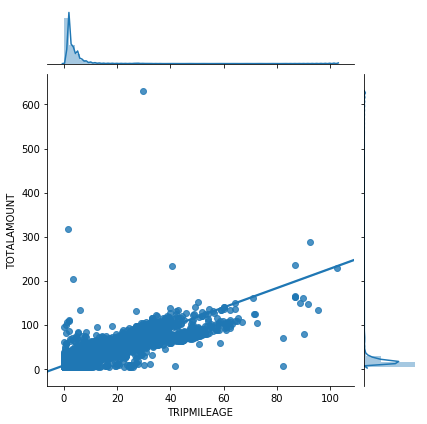

In [109]:
sns.jointplot('TRIPMILEAGE', 'TOTALAMOUNT', dc_taxi, kind='reg')

In [64]:
formula = "TOTALAMOUNT ~ C(PROVIDER) + C(dropoff_quadrant) + TRIPMILEAGE"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTALAMOUNT   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1213.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:20:19   Log-Likelihood:            -4.2373e+05
No. Observations:              159145   AIC:                         8.475e+05
Df Residuals:                  159133   BIC:                         8.476e+05
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.5886      0.096     79.178      0.000       7.401       7.776
C(PROVIDER)[T.DCVIP Cab]            0.2899      0.040      7.308      0.000       0.212       0.368
C(PROVIDER)[T.Hitch]               -0.3589      0.024    -14.952      0.000      -0.406      -0.312
C(PROVIDER)[T.My Taxi Control]      0.2937      0.090      3.245      0.001       0.116       0.471
C(PROVIDER)[T.Transco, Inc.]       -0.2360      0.025     -9.278      0.000      -0.286      -0.186
C(PROVIDER)[T.United Ventures]      0.1391      0.024      5.845      0.000       0.092       0.186
C(PROVIDER)[T.Verifone]            -0.0331      0.026     -1.280      0.201      -0.084       0.018
C(PROVIDER)[T.Yellow Cab of DC]    -2.1267      0.077    -27.625      0.000      -2.278      -1.976
C(dropoff_quadrant)[T.NW]          -0.6121      0.036    -16.963      0.000      -0.683      -0.541
C(dropoff_quadrant)[T.SE]          -0.3409      0.053     -6.457      0.000      -0.444      -0.237
C(dropoff_quadrant)[T.SW]          -0.7005      0.052    -13.517      0.000      -0.802      -0.599
TRIPMILEAGE                         2.4478      0.036     67.673      0.000       2.377       2.519
==============================================================================
Omnibus:                   195892.564   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2069159688.490
Skew:                           5.267   Prob(JB):                         0.00
Kurtosis:                     561.507   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [25]:
dc_taxi.groupby(['PROVIDER', 'AIRPORT'])['TOTALAMOUNT'].sum()

PROVIDER          AIRPORT
CMT               False      526254.29
                  True       119816.85
DCVIP Cab         False      285752.47
                  True        87787.45
Hitch             False      313646.84
                  True        85614.20
My Taxi Control   False       22620.13
                  True         8953.02
Transco, Inc.     False      304172.11
                  True        59710.80
United Ventures   False      312926.36
                  True       135010.45
Verifone          False      307016.28
                  True        70246.34
Yellow Cab of DC  False      251743.97
                  True        49096.80
Name: TOTALAMOUNT, dtype: float64

In [28]:
dc_taxi.columns

Index(['TRIPTYPE', 'PROVIDER', 'METERFARE', 'TIP', 'SURCHARGE', 'EXTRAS',
       'TOLLS', 'TOTALAMOUNT', 'PAYMENTTYPE', 'PAYMENTCARDPROVIDER',
       'PICKUPCITY', 'PICKUPSTATE', 'PICKUPZIP', 'DROPOFFCITY', 'DROPOFFSTATE',
       'DROPOFFZIP', 'TRIPMILEAGE', 'TRIPTIME', 'PICKUP_BLOCK_LATITUDE',
       'PICKUP_BLOCK_LONGITUDE', 'PICKUP_BLOCKNAME', 'DROPOFF_BLOCK_LATITUDE',
       'DROPOFF_BLOCK_LONGITUDE', 'DROPOFF_BLOCKNAME', 'AIRPORT',
       'PICKUPDATETIME_TR', 'DROPOFFDATETIME_TR', 'pickup_quadrant',
       'dropoff_quadrant', 'tipping', 'pickup_datetime', 'dropoff_datetime',
       'pickup_date', 'pickup_hour', 'dropoff_date', 'dropoff_hour'],
      dtype='object')

In [29]:
dc_taxi_airport = dc_taxi[dc_taxi['AIRPORT'] == True]

In [35]:
dc_taxi_airport = dc_taxi_airport[['DROPOFF_BLOCK_LONGITUDE','DROPOFF_BLOCK_LATITUDE']]
dc_taxi_airport

,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE
75,NaN,NaN
81,-77.031962,38.900771
82,-77.054005,38.925704
83,NaN,NaN
84,NaN,NaN
85,NaN,NaN
86,NaN,NaN
87,NaN,NaN
88,-77.011832,38.951580
98,NaN,NaN


In [36]:
dc_taxi_airport.isna().sum()

DROPOFF_BLOCK_LONGITUDE    13181
DROPOFF_BLOCK_LATITUDE     13181
dtype: int64

In [37]:
dc_taxi_airport.dropna()

,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE
81,-77.031962,38.900771
82,-77.054005,38.925704
88,-77.011832,38.951580
151,-77.070013,38.918461
152,-77.032804,38.897347
153,-77.031950,38.908039
259,-77.034559,38.909175
261,-76.987603,38.933702
262,-77.028084,38.897829
320,-77.033644,38.900769


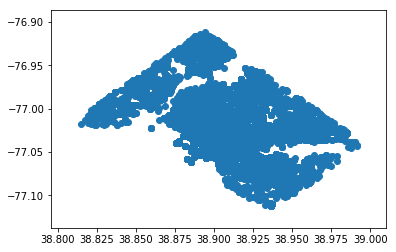

In [50]:
plt.scatter(dc_taxi.PICKUP_BLOCK_LATITUDE, dc_taxi.PICKUP_BLOCK_LONGITUDE)

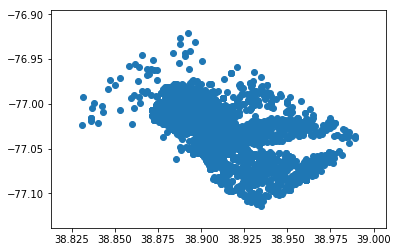

In [55]:
plt.scatter(dc_taxi_airport.DROPOFF_BLOCK_LATITUDE, dc_taxi_airport.DROPOFF_BLOCK_LONGITUDE)

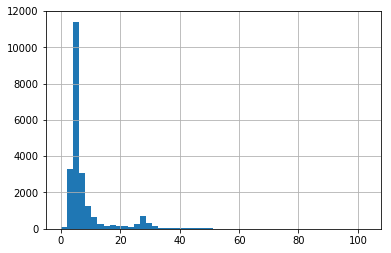

In [52]:
dc_taxi.loc[dc_taxi.AIRPORT].TRIPMILEAGE.hist(bins=50)

In [56]:
dc_taxi['TOLLS'].value_counts()

0.00     202017
1.50         38
5.00          7
2.00          7
4.00          5
3.50          4
1.00          3
2.50          2
3.00          2
2.48          1
7.00          1
15.00         1
8.00          1
1.95          1
9.00          1
33.00         1
Name: TOLLS, dtype: int64

In [59]:
dc_taxi['DROPOFFSTATE'].value_counts()

District of Columbia    137850
Virginia                 18707
Maryland                  5297
Nebraska                  1142
Connecticut                 32
Montana                     31
American Samoa              17
Arkansas                     7
Delaware                     2
Indiana                      1
Massachusetts                1
Alabama                      1
Name: DROPOFFSTATE, dtype: int64

In [61]:
dc_taxi['TRIPTYPE'].value_counts()

PSP             199386
TRANSPORT-DC      1353
DDS               1353
Name: TRIPTYPE, dtype: int64

In [77]:
dc_taxi['DROPOFFZIP'].value_counts()

20001         22989
20005         13456
20002         13102
20009         12277
20004         11523
20036          9830
20037          9733
22202          8532
20007          7459
20006          7025
20024          6928
20003          6528
20008          4821
20010          3755
20011          3594
20016          2216
20019           957
22209           941
20015           904
20017           893
20020           859
22201           856
20018           728
20012           719
20560           521
20815           506
20910           477
20032           472
20166           450
ton D           393
              ...  
21702             1
60093             1
21223             1
l Brg             1
20423             1
ilver             1
[Us-              1
ton V             1
20659             1
20542             1
20755             1
87110             1
Se Wa             1
rgini             1
Arli              1
20678             1
20020, USA        1
20374             1
47714             1


In [83]:
dc_taxi.DROPOFFZIP.str.extract(r"([0-9]{5})").iloc[:, 0].value_counts()

20001    22992
20005    13458
20002    13102
20009    12277
20004    11523
20036     9830
20037     9734
22202     8532
20007     7459
20006     7025
20024     6928
20003     6528
20008     4821
20010     3755
20011     3594
20016     2216
20019      960
22209      941
20015      904
20017      893
20020      860
22201      856
20018      729
20012      719
20560      521
20815      506
20910      477
20032      475
20166      450
22314      378
         ...  
20441        1
20111        1
20732        1
21613        1
21230        1
47715        1
89801        1
60561        1
22332        1
20704        1
60093        1
21702        1
21771        1
20542        1
20659        1
21208        1
20152        1
20423        1
87110        1
62271        1
20374        1
60487        1
20164        1
20755        1
21227        1
21223        1
21287        1
21209        1
47714        1
20880        1
Name: 0, Length: 339, dtype: int64

In [86]:
dc_taxi['DROPOFFZIP'] = dc_taxi.DROPOFFZIP.str.extract(r"([0-9]{5})")

In [89]:
formula = "tipping ~ C(dc_taxi.DROPOFFZIP)"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 338, but rank is 254
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tipping   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     762.4
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:15:54   Log-Likelihood:            -1.1647e+05
No. Observations:              165040   AIC:                         2.336e+05
Df Residuals:                  164701   BIC:                         2.370e+05
Df Model:                         338                                         
Covariance Type:                  HC1                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.714e-12   1.51e-11      0.378      0.705   -2.39e-11    3.53e-11
C(dc_taxi.DROPOFFZIP)[T.20001]     0.5524      0.003    168.280      0.000       0.546       0.559
C(dc_taxi.DROPOFFZIP)[T.20002]     0.5260      0.004    120.443      0.000       0.517       0.535
C(dc_taxi.DROPOFFZIP)[T.20003]     0.6017      0.006     99.207      0.000       0.590       0.614
C(dc_taxi.DROPOFFZIP)[T.20004]     0.5381      0.005    115.752      0.000       0.529       0.547
C(dc_taxi.DROPOFFZIP)[T.20005]     0.5662      0.004    132.400      0.000       0.558       0.575
C(dc_taxi.DROPOFFZIP)[T.20006]     0.5794      0.006     98.264      0.000       0.568       0.591
C(dc_taxi.DROPOFFZIP)[T.20007]     0.5317      0.006     91.933      0.000       0.520       0.543
C(dc_taxi.DROPOFFZIP)[T.20008]     0.5082      0.007     70.508      0.000       0.494       0.522
C(dc_taxi.DROPOFFZIP)[T.20009]     0.5488      0.004    122.081      0.000       0.540       0.558
C(dc_taxi.DROPOFFZIP)[T.20010]     0.3936      0.008     49.319      0.000       0.378       0.409
C(dc_taxi.DROPOFFZIP)[T.20011]     0.2571      0.007     35.231      0.000       0.243       0.271
C(dc_taxi.DROPOFFZIP)[T.20012]     0.3866      0.018     21.268      0.000       0.351       0.422
C(dc_taxi.DROPOFFZIP)[T.20013]     0.6933      0.053     13.008      0.000       0.589       0.798
C(dc_taxi.DROPOFFZIP)[T.20015]     0.5586      0.017     33.791      0.000       0.526       0.591
C(dc_taxi.DROPOFFZIP)[T.20016]     0.5523      0.011     52.236      0.000       0.532       0.573
C(dc_taxi.DROPOFFZIP)[T.20017]     0.2912      0.015     19.132      0.000       0.261       0.321
C(dc_taxi.DROPOFFZIP)[T.20018]     0.2044      0.015     13.671      0.000       0.175       0.234
C(dc_taxi.DROPOFFZIP)[T.20019]     0.1021      0.010     10.436      0.000       0.083       0.121
C(dc_taxi.DROPOFFZIP)[T.20020]     0.1221      0.011     10.925      0.000       0.100       0.144
C(dc_taxi.DROPOFFZIP)[T.20024]     0.4796      0.006     79.831      0.000       0.468       0.491
C(dc_taxi.DROPOFFZIP)[T.20032]     0.1516      0.016      9.203      0.000       0.119       0.184
C(dc_taxi.DROPOFFZIP)[T.20036]     0.5664      0.005    113.207      0.000       0.557       0.576
C(dc_taxi.DROPOFFZIP)[T.20037]     0.5126      0.005    101.083      0.000       0.503       0.523
C(dc_taxi.DROPOFFZIP)[T.20038] -5.761e-12   1.51e-11     -0.381      0.703   -3.54e-11    2.38e-11
C(dc_taxi.DROPOFFZIP)[T.20045]     0.5980      0.028     21.315      0.000       0.543       0.653
C(dc_taxi.DROPOFFZIP)[T.20052]     0.5439      0.027     20.173      0.000       0.491       0.597
C(dc_taxi.DROPOFFZIP)[T.20056]     1.0000   1.51e-11   6.62e+10      0.000       1.000       1.000
C(dc_taxi.DROP

In [101]:
formula = "tipping ~ C()"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tipping   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     57.22
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           5.85e-37
Time:                        14:37:19   Log-Likelihood:            -1.1467e+05
No. Observations:              159145   AIC:                         2.293e+05
Df Residuals:                  159141   BIC:                         2.294e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.4197      0.004    113.171      0.000       0.412       0.427
C(dropoff_quadrant)[T.NW]     0.0392      0.004      9.857      0.000       0.031       0.047
C(dropoff_quadrant)[T.SE]     0.0412      0.006      6.489      0.000       0.029       0.054
C(dropoff_quadrant)[T.SW]    -0.0074      0.006     -1.230      0.219      -0.019       0.004
==============================================================================
Omnibus:                   556597.212   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26422.940
Skew:                           0.195   Prob(JB):                         0.00
Kurtosis:                       1.042   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [103]:
dc_taxi['TRIPTIME'].value_counts()

8.0      13514
10.0     13370
9.0      12870
7.0      12341
11.0     11937
6.0      11791
12.0     11625
13.0     10458
14.0     10018
5.0       9573
15.0      8720
16.0      7992
4.0       7413
17.0      6819
18.0      5973
19.0      5082
20.0      4435
3.0       3851
21.0      3798
22.0      3293
23.0      2709
24.0      2572
25.0      2150
26.0      1883
27.0      1620
2.0       1550
28.0      1451
29.0      1161
30.0      1105
31.0      1028
         ...  
87.0         8
92.0         8
102.0        8
101.0        7
94.0         7
107.0        7
97.0         7
115.0        7
98.0         7
84.0         6
116.0        6
96.0         6
90.0         6
93.0         6
111.0        6
85.0         6
112.0        6
105.0        5
109.0        5
99.0         5
108.0        5
100.0        4
117.0        4
106.0        4
110.0        3
119.0        3
104.0        3
103.0        2
113.0        2
114.0        1
Name: TRIPTIME, Length: 118, dtype: int64